### **1. Data preprocessing (konwersja, usunięcie pustych wartości etc.)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for 2003 (apparently)
df = pd.read_csv('countries.csv', sep=';')
df = df.drop(index=0) # Remove data types row

C:\Users\Jacob\AppData\Local\Temp\ipykernel_21352\29804175.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Convert data types
df['Country'] = df['Country'].astype('string')
num_cols = df.columns
num_cols = [x for x in num_cols if x != 'Country']
df[num_cols] = df[num_cols].astype(float)
df.dtypes

Country                                           string[python]
Area(sq km)                                              float64
Birth rate(births/1000 population)                       float64
Current account balance                                  float64
Death rate(deaths/1000 population)                       float64
Debt - external                                          float64
Electricity - consumption(kWh)                           float64
Electricity - production(kWh)                            float64
Exports                                                  float64
GDP                                                      float64
GDP - per capita                                         float64
GDP - real growth rate(%)                                float64
HIV/AIDS - adult prevalence rate(%)                      float64
HIV/AIDS - deaths                                        float64
HIV/AIDS - people living with HIV/AIDS                   float64
Highways(km)             

### **2. Wizualizacja danych**

##### **Porównanie PKB i długu publicznego (% PKB) z 15-stu największych państw pod względem PKB**

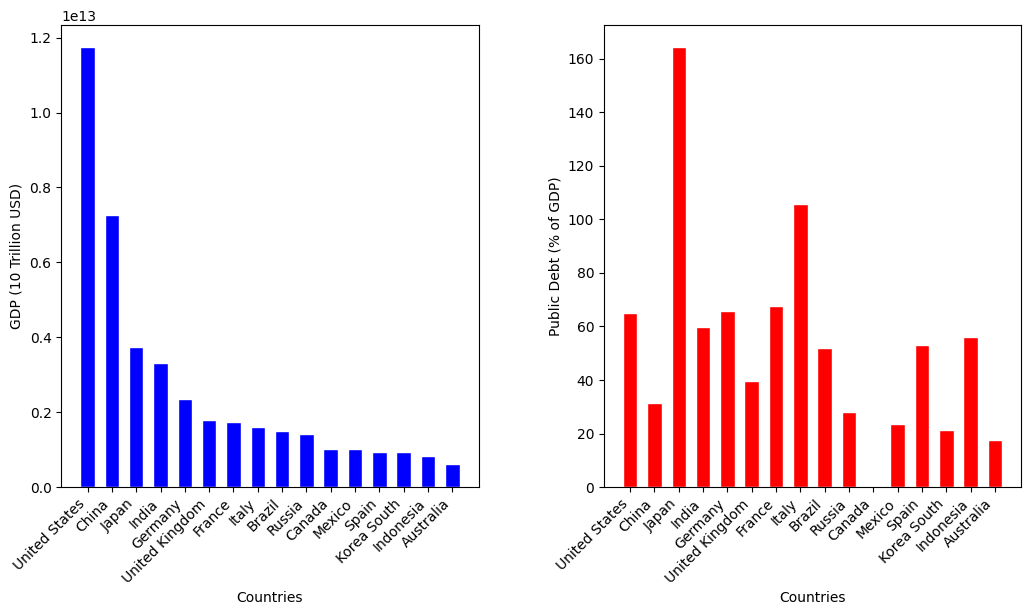

In [3]:
df_nn = df.dropna(axis=0, subset=['GDP'])
df_nn = df_nn.sort_values(by='GDP', ascending=False)

# Remove EU from set
eu = df_nn['Country'] == '#European Union'
df_nn = df_nn.drop(df_nn.index[eu])

countries = df_nn['Country'].head(16).to_list()
gdp = df_nn['GDP'].head(16).to_list()
public_debt = df_nn[f'Public debt(% of GDP)'].head(16).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(countries, gdp, color='blue', width=0.6, edgecolor='white')
ax1.set_xticks(range(len(countries)))
ax1.set_xticklabels(countries, rotation=45, ha='right')
ax1.set_xlabel('Countries')
ax1.set_ylabel('GDP (10 Trillion USD)')

ax2.bar(countries, public_debt, color='red', width=0.6, edgecolor='white')
ax2.set_xticks(range(len(countries)))
ax2.set_xticklabels(countries, rotation=45, ha='right')
ax2.set_xlabel('Countries')
ax2.set_ylabel(f'Public Debt (% of GDP)')

plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
plt.show()

Kraje są posortowane malejąco (PKB), na wykresach możemy zauważyć, że procentowo najbardziej zadłużonym krajem jest Japonia oraz Włochy, zaś nominalnie USA, które jednocześnie posiada najwyższy wskaźnik PKB odbiegający od innych państw.

##### **Porównanie zużycia energii i populacji w USA, UE i Chinach**

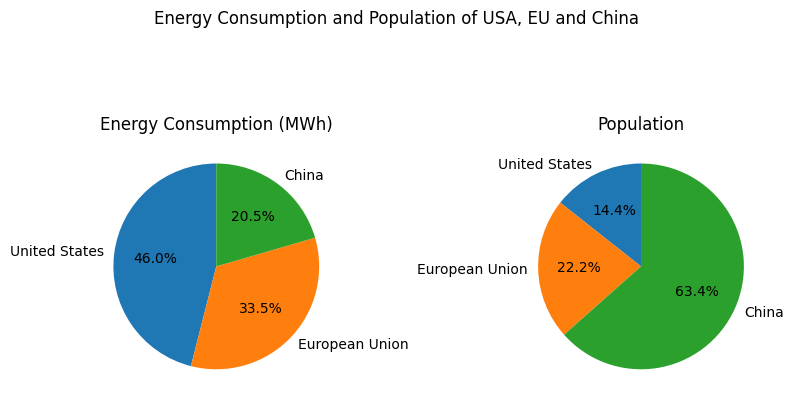

In [4]:
df_energy = df.sort_values(by='GDP', ascending=False)
countries = df_energy['Country'].head(3).to_list()
energy_consumption = df_energy['Electricity - consumption(kWh)'].head(3).to_list()
population = df_energy['Population'].head(3).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.pie(energy_consumption, labels=['United States', 'European Union', 'China'], autopct="%1.1f%%", startangle=90)
ax1.set_title("Energy Consumption (MWh)")

ax2.pie(population, labels=['United States', 'European Union', 'China'], autopct="%1.1f%%", startangle=90)
ax2.set_title("Population")

plt.suptitle("Energy Consumption and Population of USA, EU and China")
plt.tight_layout()

plt.show()

Na wykresach kołowych widzimy, że mimo największej populacji Chiny zużywają w stosunku do USA i UE, najmniejsze ilości energii, w przypadku Stanów Zjednoczonych przypadek jest odwrotny - najmniejsza populacja przy największym zuzyciu energii.

##### **Korelacja na macierzy: PKB per capita oraz HIV/AIDS - wzkaźnik zachorowań wśród dorosłych(%) z 50-ciu najbiedniejszych państw pod względem PKB**

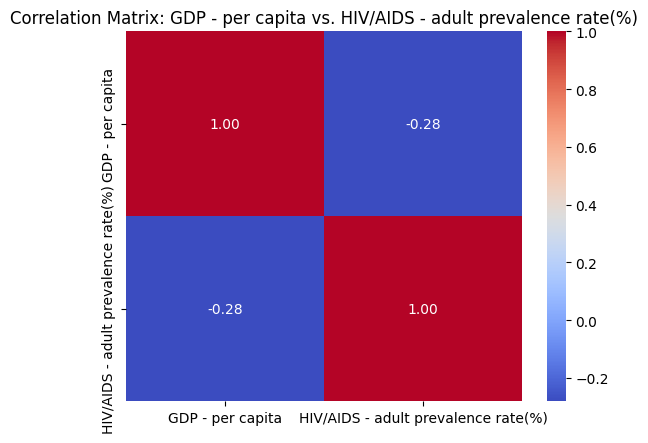

In [5]:
corr_df_sorted = df.sort_values(by='GDP', ascending=False)
corr_df = corr_df_sorted[['GDP - per capita', 'HIV/AIDS - adult prevalence rate(%)']].iloc[150:200]
corr_df.dropna(inplace=True)
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: GDP - per capita vs. HIV/AIDS - adult prevalence rate(%)')
plt.show()

Macierz pokazuje słabą negatyną korelację między PKB per capita, a zachorowaniami na HIV/AIDS u dorosłych. Oznacza to łagodną tendencję krajów z wysokim PKB per capita do niższej liczby zachorowań, nie jest to jednak silna zależność. 

##### **Zestawienie państw z największą liczbą ludności (posortowaną malejąco), ich siłą roboczą i stopniem bezrobocia**

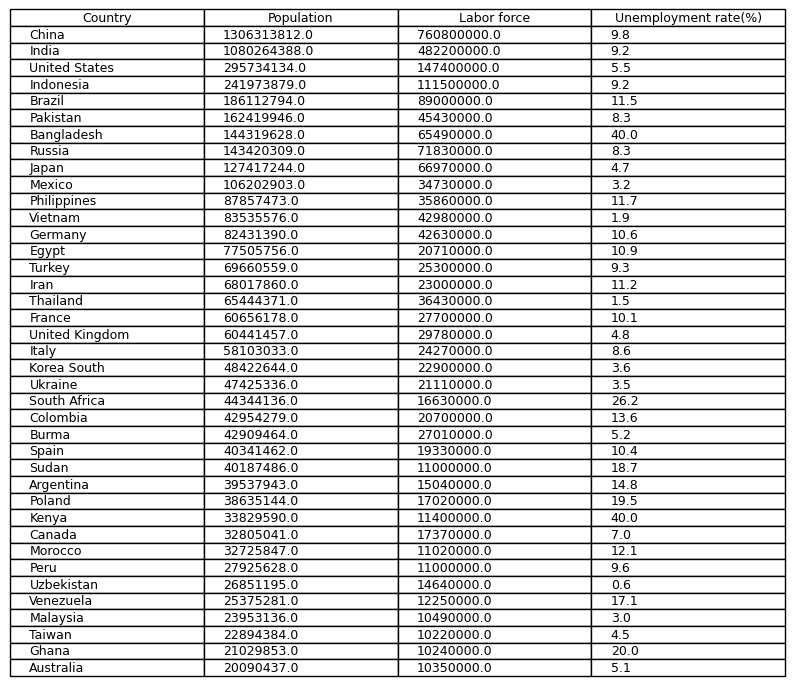

In [11]:
df_labor_force = df[df['Labor force'] > 10000000]
df_labor_force = df_labor_force[df_labor_force['Country'] != '#European Union']
df_labor_force = df_labor_force[pd.to_numeric(df_labor_force['Unemployment rate(%)'], errors='coerce').notna()]
df_labor_force = df_labor_force[['Country', 'Population', 'Labor force', 'Unemployment rate(%)']]
df_labor_force = df_labor_force.sort_values(by='Population', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_axis_off()
ax.table(colLabels=['Country', 'Population', 'Labor force', 'Unemployment rate(%)'],
          cellText=df_labor_force.values,
          loc='center', cellLoc='left')

plt.show()

W tym zestawieniu widzimy, że część państw wyróżnia się wyraźnie wysoką stopą bezrobocia: RPA, Wenezuela, Ghana, Bangladesz a nawet Polska, czyli są to głównie kraje rozwijające się.